In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached tensorflow_gpu-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.14.0-py3-none-any.whl (5.5 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached grpcio-1.32.0-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached google_auth-2.29.0-py2.py3-none-any.whl (189 kB)
  

In [34]:
# gerekli kütüphaneleri burada import ediyorum
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [35]:
# Derin öğrenme için gerekli olacak olan kütüphaneyi burada import ediyorum
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [36]:
# GPu bellek tüketimi artışı ayarlanıyor
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [37]:
# data klasörü altında positive,negative ve anchor adında 3 tane klasörün yolunu ayarlıyorum
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [38]:
# Burada klasörleri oluşturuyoru
os.makedirs(POS_PATH, exist_ok=True)
os.makedirs(NEG_PATH, exist_ok=True)
os.makedirs(ANC_PATH, exist_ok=True)

In [7]:
# http://vis-www.cs.umass.edu/lfw/ : veri setimizi dosyasını buradan indirdim

In [8]:
#indirdiğimiz veri seti dosyası tar gz uzantılı sıkıştırılmış bir dosyaydı bunu aşağıdaki komut ile açıyoruz
!tar -xf lfw.tgz

In [9]:
# LFW dosyasındaki resimleri data/negative klasörüne taşıyoruz.
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [11]:
os.listdir("lfw")

['Aaron_Eckhart',
 'Aaron_Guiel',
 'Aaron_Patterson',
 'Aaron_Peirsol',
 'Aaron_Pena',
 'Aaron_Sorkin',
 'Aaron_Tippin',
 'Abbas_Kiarostami',
 'Abba_Eban',
 'Abdel_Aziz_Al-Hakim',
 'Abdel_Madi_Shabneh',
 'Abdel_Nasser_Assidi',
 'Abdoulaye_Wade',
 'Abdulaziz_Kamilov',
 'Abdullah',
 'Abdullah_Ahmad_Badawi',
 'Abdullah_al-Attiyah',
 'Abdullah_Gul',
 'Abdullah_Nasseef',
 'Abdullatif_Sener',
 'Abdul_Majeed_Shobokshi',
 'Abdul_Rahman',
 'Abel_Aguilar',
 'Abel_Pacheco',
 'Abid_Hamid_Mahmud_Al-Tikriti',
 'Abner_Martinez',
 'Abraham_Foxman',
 'Aby_Har-Even',
 'Adam_Ant',
 'Adam_Freier',
 'Adam_Herbert',
 'Adam_Kennedy',
 'Adam_Mair',
 'Adam_Rich',
 'Adam_Sandler',
 'Adam_Scott',
 'Adelina_Avila',
 'Adel_Al-Jubeir',
 'Adisai_Bodharamik',
 'Adolfo_Aguilar_Zinser',
 'Adolfo_Rodriguez_Saa',
 'Adoor_Gopalakarishnan',
 'Adriana_Lima',
 'Adriana_Perez_Navarro',
 'Adrianna_Zuzic',
 'Adrian_Annus',
 'Adrian_Fernandez',
 'Adrian_McPherson',
 'Adrian_Murrell',
 'Adrian_Nastase',
 'Adrien_Brody',
 'Afton_S

In [39]:
#Benzersiz görüntü adları oluşturmak için uuid kütüphanesini import ediyoruz
import uuid

In [40]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\818262d4-1f85-11ef-9af2-f7d771faab40.jpg'

In [41]:
# Burada web kamerasına erişim sağlamaya çalışıyoruz
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # çerçevemizin 250x250 piksel olacak şekilde ayarlıyoruz
    frame = frame[120:120+250,200:200+250, :]
    
    # anchors görüntüleri topluyoruz
    if cv2.waitKey(1) & 0XFF == ord('a'):
        #Benzersiz bir dosya yolu oluşturuyoruz 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        #anchor resimleri yazdırıyoruz
        cv2.imwrite(imgname, frame)
    
    # positive klasörü için görüntü topluyoruz
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Benzersiz bir dosya yolu oluşturuyoruz 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        #positive resimleri yazdırıyoruz
        cv2.imwrite(imgname, frame)
    
    # resmi ekranda göstermek için aşağıdaki kodu yazıyoruz
    cv2.imshow('Image Collection', frame)
    
    # kameradan çıkış yapmak için q ya basmamız gerekiyor
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# web kamerasını serbest bırakan kod parçası
cap.release()
# resmi gösteren çerçeveyi kapatıyoruz
cv2.destroyAllWindows()

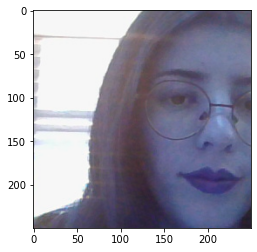

In [14]:
plt.imshow(frame)
plt.show()

In [42]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

In [43]:
dir_test = anchor.as_numpy_iterator()

In [44]:
print(dir_test.next())

b'data\\anchor\\d3c5fa8e-141d-11ef-9f7f-401c838410fb.jpg'


In [45]:
def preprocess(file_path):
    
    #belirtilen dosya yolundan resim okuma işlemi yapılıyor
    byte_img = tf.io.read_file(file_path)
    # byte_img yi img adlı değişkene yüklüyoruz
    img = tf.io.decode_jpeg(byte_img)
    
    # görüntüyü 100x100 olacak şekilde yeniden boyutlandırıyoruz
    img = tf.image.resize(img, (100,100))
    # resim 0 ve 1 arasında olacak şekilde yeniden şekillendiriyoruz
    img = img / 255.0
    
    #fonksiyonda resim döndürüyoruz
    return img

In [46]:
img = preprocess('data\\anchor\\47908c02-1419-11ef-830a-401c838410fb.jpg')

In [47]:
img.numpy().max() 

1.0

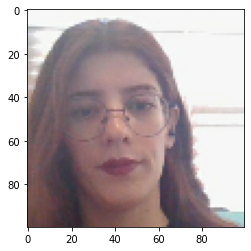

In [48]:
plt.imshow(img)

In [19]:
dataset.map(preprocess)

NameError: name 'dataset' is not defined

In [ ]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [49]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [50]:
samples = data.as_numpy_iterator()

In [51]:
exampple = samples.next()

In [23]:
exampple

(b'data\\anchor\\80bec870-141a-11ef-9fa6-401c838410fb.jpg',
 b'data\\positive\\fd9ee63c-141c-11ef-81af-401c838410fb.jpg',
 1.0)

In [52]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [53]:
res = preprocess_twin(*exampple)

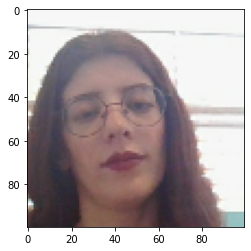

In [54]:
plt.imshow(res[0])

In [31]:
res[2]

1.0

In [55]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [56]:
data

<ShuffleDataset shapes: ((100, 100, None), (100, 100, None), ()), types: (tf.float32, tf.float32, tf.float32)>

In [57]:
samples = data.as_numpy_iterator()

In [25]:
samples.next()

(array([[[0.9647059 , 0.972549  , 0.96862745],
         [0.9647059 , 0.972549  , 0.96862745],
         [0.9647059 , 0.972549  , 0.96862745],
         ...,
         [0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96862745, 0.96862745]],
 
        [[0.96568626, 0.97156864, 0.96862745],
         [0.96568626, 0.97156864, 0.96862745],
         [0.96568626, 0.97156864, 0.96862745],
         ...,
         [0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96862745, 0.96862745]],
 
        [[0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96862745, 0.96862745],
         ...,
         [0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96862745, 0.96862745]],
 
        ...,
 
        [[0.5095588 , 0.51348037, 0.4879902 ],
         [0.51960784, 0.53088236, 0.50220

In [26]:
len(samples.next())

3

In [58]:
sam=samples.next()

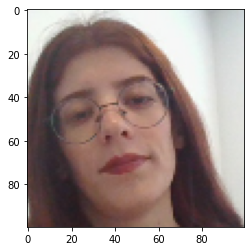

In [28]:
plt.imshow(sam[1])

In [38]:
sam[2]

0.0

In [59]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)


In [60]:
data

<ShuffleDataset shapes: ((100, 100, None), (100, 100, None), ()), types: (tf.float32, tf.float32, tf.float32)>

In [61]:
train_data

<PrefetchDataset shapes: ((None, 100, 100, None), (None, 100, 100, None), (None,)), types: (tf.float32, tf.float32, tf.float32)>

In [115]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [116]:
inp = Input(shape=(100,100,3), name='input_image')

In [117]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [118]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [119]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [67]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [68]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [69]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [70]:
mod.summary()

Model: "embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 91, 91, 64)        19264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 128)       401536    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 128)       262272    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0 

In [71]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [72]:
embedding = make_embedding()

In [73]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 91, 91, 64)        19264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 40, 128)       401536    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 128)       262272    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 128)         0 

In [74]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [75]:
l1 = L1Dist()

In [45]:
l1(anchor_embedding, validation_embedding)

NameError: name 'anchor_embedding' is not defined

In [86]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [87]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [88]:
siamese_layer = L1Dist()

In [89]:

distances = siamese_layer(inp_embedding, val_embedding)

In [90]:
classifier = Dense(1, activation='sigmoid')(distances)

In [91]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_3')>

In [92]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [93]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
l1_dist_2 (L1Dist)              (None, 4096)         0           embedding[2][0]     

In [94]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [95]:
siamese_model = make_siamese_model()

In [96]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
distance (L1Dist)               (None, 4096)         0           embedding[4][0]     

In [97]:
#Bu Bölümde sinir ağını eğitmeye başlıyoruz
binary_cross_loss = tf.losses.BinaryCrossentropy() #Burada kayıp fonksiyonunu oluşturuyoruz

In [98]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001   burada da optimize ediciyi oluşturuyoruz

In [99]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')#kontrol noktalarımızı tutmak için bir dizin oluşturzduk
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [100]:
test_batch = train_data.as_numpy_iterator()

In [101]:
batch_1 = test_batch.next()

In [102]:
X = batch_1[:2]

In [103]:
y = batch_1[2]

In [104]:
y

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
      dtype=float32)

In [105]:
tf.losses.BinaryCrossentropy??

In [132]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    # Return loss
    return loss

In [133]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [89]:
EPOCHS = 50

In [ ]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
25/26 [===========================>..] - ETA: 21sTensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)


In [168]:
##MODELİ DEĞERLENDİRME BÖLÜMÜ
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [169]:
#Bu kısımdan sonra veri modelini değerlendirip test edeceğiz
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [170]:
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

array([[0.4979385 ],
       [0.49946845],
       [0.49970388],
       [0.50008   ],
       [0.4998001 ],
       [0.49782196],
       [0.49677345],
       [0.4982753 ],
       [0.49999213],
       [0.498979  ],
       [0.4990614 ],
       [0.4971178 ],
       [0.49995235],
       [0.49945012],
       [0.4976321 ],
       [0.500227  ]], dtype=float32)

In [171]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [172]:
y_true

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.],
      dtype=float32)

In [173]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

0.0

In [174]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

0.0

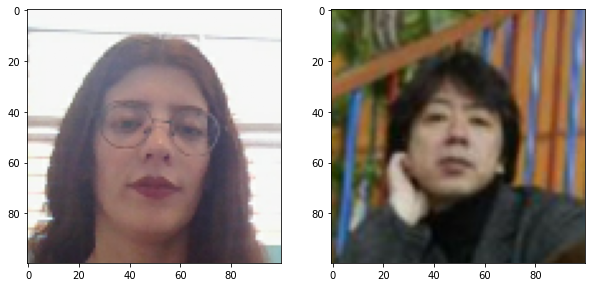

In [175]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[6])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[6])

# Renders cleanly
plt.show()

In [159]:
##MODELİ KAYDETME BÖLÜMÜ

In [75]:
# Save weights
siamese_model.save('siamesemodel.h5')

In [76]:
L1Dist

__main__.L1Dist

In [77]:
# Reload model 
model = tf.keras.models.load_model('siamesemodel.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [78]:
# Make predictions with reloaded model
model.predict([test_input, test_val])

array([[0.49807706],
       [0.49919045],
       [0.49829102],
       [0.49742174],
       [0.49843618],
       [0.4993304 ],
       [0.49564552],
       [0.4972754 ],
       [0.49935398],
       [0.4960412 ],
       [0.50063205],
       [0.49725395],
       [0.5008445 ],
       [0.49968013],
       [0.49952516],
       [0.497717  ]], dtype=float32)

In [79]:
# Model Özeti
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
l1_dist_2 (L1Dist)              (None, 4096)         0           embedding[0][0]     

In [80]:
##GERÇEK ZAMANLI YÜZ TANIMA TESTİ

In [81]:
#Doğrulama işlemi
application_data = "application_data/verification_images"

In [82]:
os.listdir(os.path.join('application_data', 'verification_images'))

['00ee1264-141d-11ef-89dc-401c838410fb.jpg',
 '01ae9c81-141d-11ef-b496-401c838410fb.jpg',
 '01cf8252-141d-11ef-8b71-401c838410fb.jpg',
 '0b5ad862-141d-11ef-9c40-401c838410fb.jpg',
 '0f27e9b7-141d-11ef-9f30-401c838410fb.jpg',
 '1bf99d01-141d-11ef-a2b1-401c838410fb.jpg',
 '1cac1b06-141d-11ef-9656-401c838410fb.jpg',
 '1cd9d745-141d-11ef-b7ea-401c838410fb.jpg',
 '1d656dd5-141d-11ef-9578-401c838410fb.jpg',
 '1da2eddb-141e-11ef-86fa-401c838410fb.jpg',
 '2b1272e6-141e-11ef-aff0-401c838410fb.jpg',
 '2b461ac2-141e-11ef-a5d3-401c838410fb.jpg',
 '2bac591c-141e-11ef-b447-401c838410fb.jpg',
 '2bd1b4b6-141d-11ef-9c13-401c838410fb.jpg',
 '2cae0c4e-141e-11ef-a59b-401c838410fb.jpg',
 '2cba58b3-141d-11ef-b63c-401c838410fb.jpg',
 '2d06d5e8-141e-11ef-a950-401c838410fb.jpg',
 '2d27bded-141d-11ef-bd0f-401c838410fb.jpg',
 '2d2d0c8a-141e-11ef-b251-401c838410fb.jpg',
 '2d59d1c9-141e-11ef-9f37-401c838410fb.jpg',
 '2da43c26-141d-11ef-8aeb-401c838410fb.jpg',
 '3e526ab8-141d-11ef-bfbd-401c838410fb.jpg',
 '3ef25a7f

In [83]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data\\input_image\\input_image.jpg'

In [84]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\00ee1264-141d-11ef-89dc-401c838410fb.jpg
application_data\verification_images\01ae9c81-141d-11ef-b496-401c838410fb.jpg
application_data\verification_images\01cf8252-141d-11ef-8b71-401c838410fb.jpg
application_data\verification_images\0b5ad862-141d-11ef-9c40-401c838410fb.jpg
application_data\verification_images\0f27e9b7-141d-11ef-9f30-401c838410fb.jpg
application_data\verification_images\1bf99d01-141d-11ef-a2b1-401c838410fb.jpg
application_data\verification_images\1cac1b06-141d-11ef-9656-401c838410fb.jpg
application_data\verification_images\1cd9d745-141d-11ef-b7ea-401c838410fb.jpg
application_data\verification_images\1d656dd5-141d-11ef-9578-401c838410fb.jpg
application_data\verification_images\1da2eddb-141e-11ef-86fa-401c838410fb.jpg
application_data\verification_images\2b1272e6-141e-11ef-aff0-401c838410fb.jpg
application_data\verification_images\2b461ac2-141e-11ef-a5d3-401c838410fb.jpg
application_data\verification_images\2bac591c-141e-11ef-b447-401

In [85]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [87]:
cap = cv2.VideoCapture(4)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
#         hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#         h, s, v = cv2.split(hsv)

#         lim = 255 - 10
#         v[v > lim] = 255
#         v[v <= lim] -= 10
        
#         final_hsv = cv2.merge((h, s, v))
#         img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.9, 0.7)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

False
False
False


In [74]:
np.sum(np.squeeze(results) > 0.75)

0

In [75]:
32/50

0.64